In [1]:
# This R environment comes with all of CRAN preinstalled, as well as many other helpful packages
# The environment is defined by the kaggle/rstats docker image: https://github.com/kaggle/docker-rstats
# For example, here's several helpful packages to load in

library(ggplot2) # Data visualization
library(readr) # CSV file I/O, e.g. the read_csv function
library(corrgram) # Correlograms http://www.datavis.ca/papers/corrgram.pdf
library(car) #required for nearest neighbors
library(FNN) # nearest neighbors techniques
library(pROC) # to make ROC curve

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

system("ls ../input")
# Any results you write to the current directory are saved as output.**

wine_data <- read.csv("../input/winequality-red.csv", sep=",",header=T)


Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following objects are masked from ‘package:stats’:

    cov, smooth, var



                                               * The solo purpose of this program is for self learning and nothing else. *

First, lets check what are present in the dataset

In [2]:
head(wine_data)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


Here is the summary of this data

In [3]:
summary(wine_data$quality)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   5.000   6.000   5.636   6.000   8.000 

In [4]:
table(wine_data$quality)


  3   4   5   6   7   8 
 10  53 681 638 199  18 

# Linear Model
Here is first Linear Model with all the parameters against quality
Check summary data, R-squared value , its not that great, we need to improve it by removing unwanted parameters

In [5]:
linear_quality = lm(quality ~ fixed.acidity+volatile.acidity+citric.acid+residual.sugar+chlorides+free.sulfur.dioxide+total.sulfur.dioxide+density+pH+sulphates+alcohol, data=wine_data)
summary(linear_quality)



Call:
lm(formula = quality ~ fixed.acidity + volatile.acidity + citric.acid + 
    residual.sugar + chlorides + free.sulfur.dioxide + total.sulfur.dioxide + 
    density + pH + sulphates + alcohol, data = wine_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.68911 -0.36652 -0.04699  0.45202  2.02498 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           2.197e+01  2.119e+01   1.036   0.3002    
fixed.acidity         2.499e-02  2.595e-02   0.963   0.3357    
volatile.acidity     -1.084e+00  1.211e-01  -8.948  < 2e-16 ***
citric.acid          -1.826e-01  1.472e-01  -1.240   0.2150    
residual.sugar        1.633e-02  1.500e-02   1.089   0.2765    
chlorides            -1.874e+00  4.193e-01  -4.470 8.37e-06 ***
free.sulfur.dioxide   4.361e-03  2.171e-03   2.009   0.0447 *  
total.sulfur.dioxide -3.265e-03  7.287e-04  -4.480 8.00e-06 ***
density              -1.788e+01  2.163e+01  -0.827   0.4086    
pH                   -4.

check the relationship between all the parameters to evaluate the model


Call:
lm(formula = quality ~ alcohol, data = wine_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8442 -0.4112 -0.1690  0.5166  2.5888 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.87497    0.17471   10.73   <2e-16 ***
alcohol      0.36084    0.01668   21.64   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7104 on 1597 degrees of freedom
Multiple R-squared:  0.2267,	Adjusted R-squared:  0.2263 
F-statistic: 468.3 on 1 and 1597 DF,  p-value: < 2.2e-16


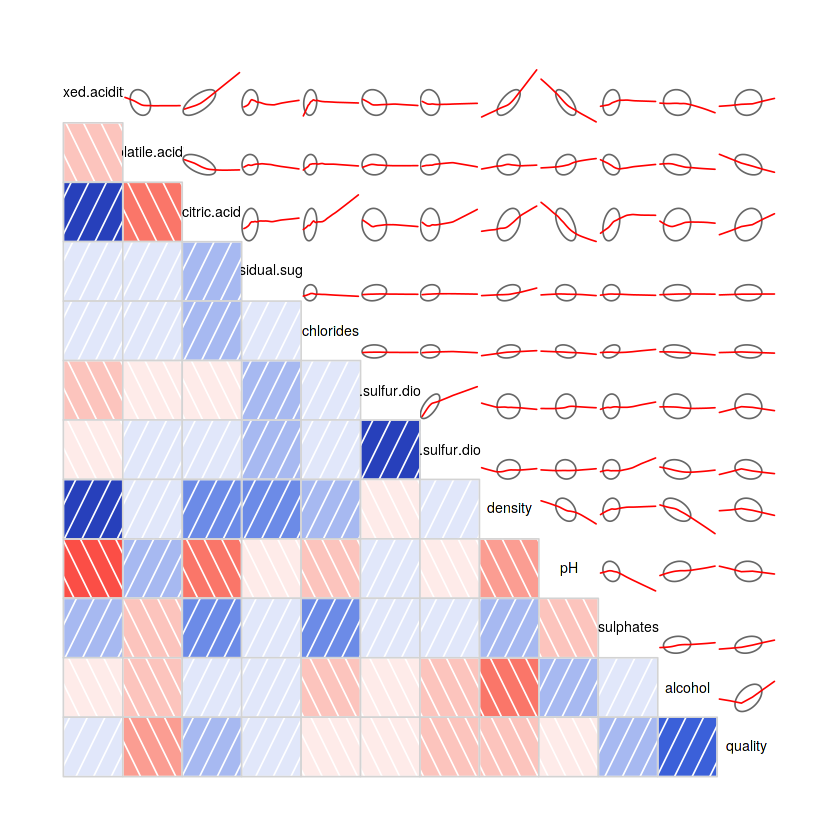

In [6]:
corrgram(wine_data, lower.panel=panel.shade, upper.panel=panel.ellipse)

linear_quality_1 = lm(quality ~ alcohol, data = wine_data)
summary(linear_quality_1)


Let us consider only those parameters which have a significant impact on quality from above co-relation matrix

In [7]:
linear_quality_4 = lm(quality ~ alcohol + volatile.acidity + citric.acid + sulphates, data = wine_data)
summary(linear_quality_4)


Call:
lm(formula = quality ~ alcohol + volatile.acidity + citric.acid + 
    sulphates, data = wine_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.71408 -0.38590 -0.06402  0.46657  2.20393 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       2.64592    0.20106  13.160  < 2e-16 ***
alcohol           0.30908    0.01581  19.553  < 2e-16 ***
volatile.acidity -1.26506    0.11266 -11.229  < 2e-16 ***
citric.acid      -0.07913    0.10381  -0.762    0.446    
sulphates         0.69552    0.10311   6.746 2.12e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6588 on 1594 degrees of freedom
Multiple R-squared:  0.3361,	Adjusted R-squared:  0.3345 
F-statistic: 201.8 on 4 and 1594 DF,  p-value: < 2.2e-16


Plot the models with with different parameters

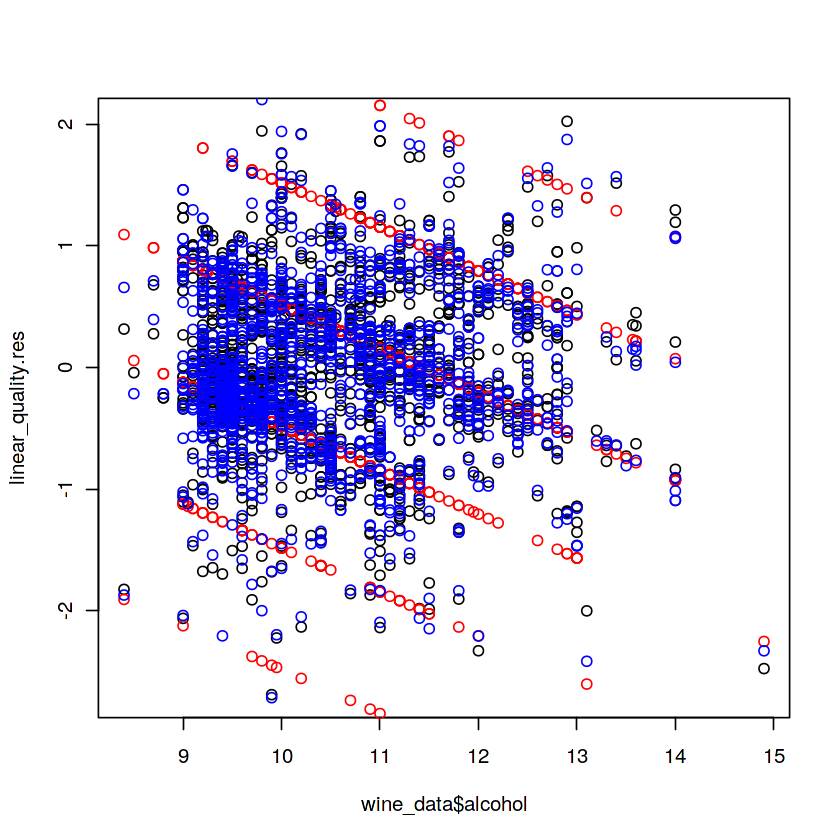

In [8]:
linear_quality.res = resid(linear_quality) # gets residuals
linear_quality_1.res = resid(linear_quality_1)
linear_quality_4.res = resid(linear_quality_4)

plot(wine_data$alcohol, linear_quality.res) # plot residuals against alcohol variable
points(wine_data$alcohol, linear_quality_1.res, col="red") # add the residuals for 1-dimension
points(wine_data$alcohol, linear_quality_4.res, col="blue") # add residuals for 4 dimension

Now check the collinierity between parameters and command to check the same is vif 

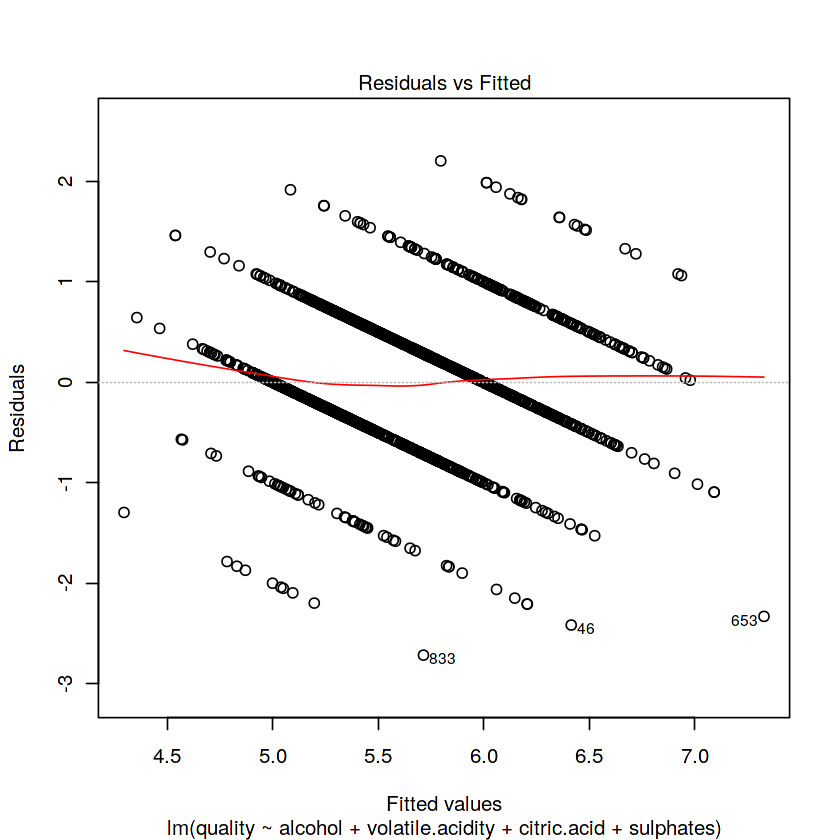

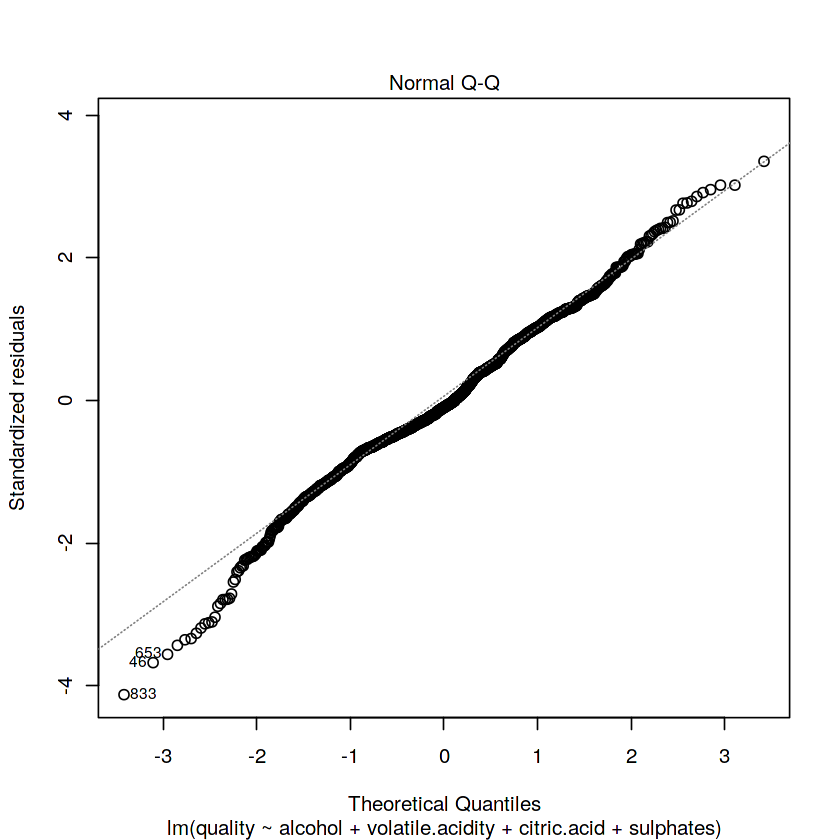

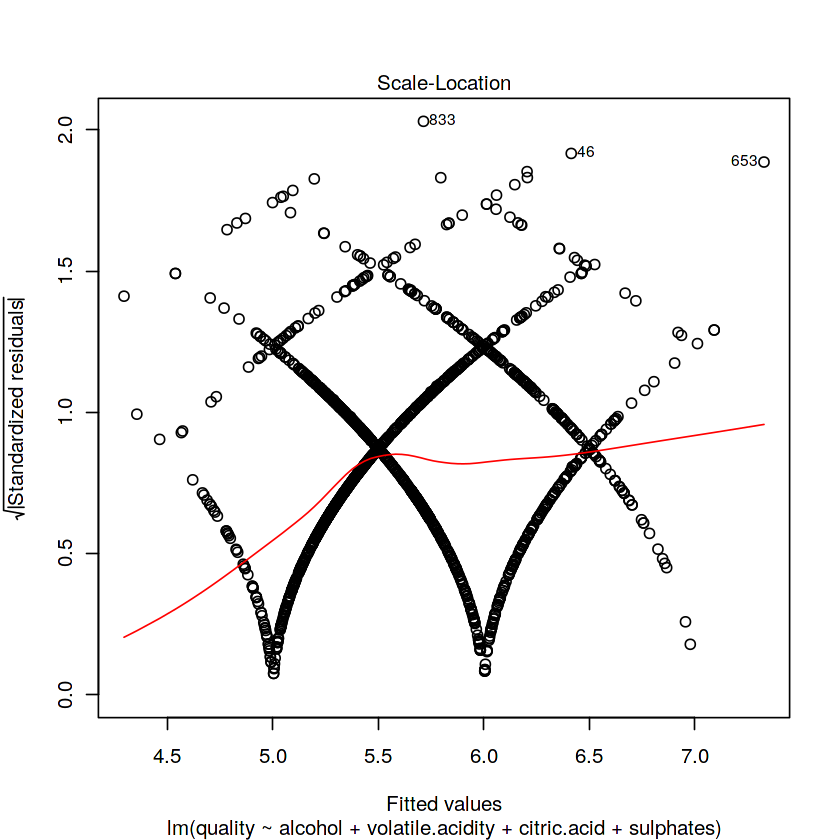

alcohol volatile.acidity      citric.acid        sulphates 
        1.044752         1.498365         1.505652         1.124597

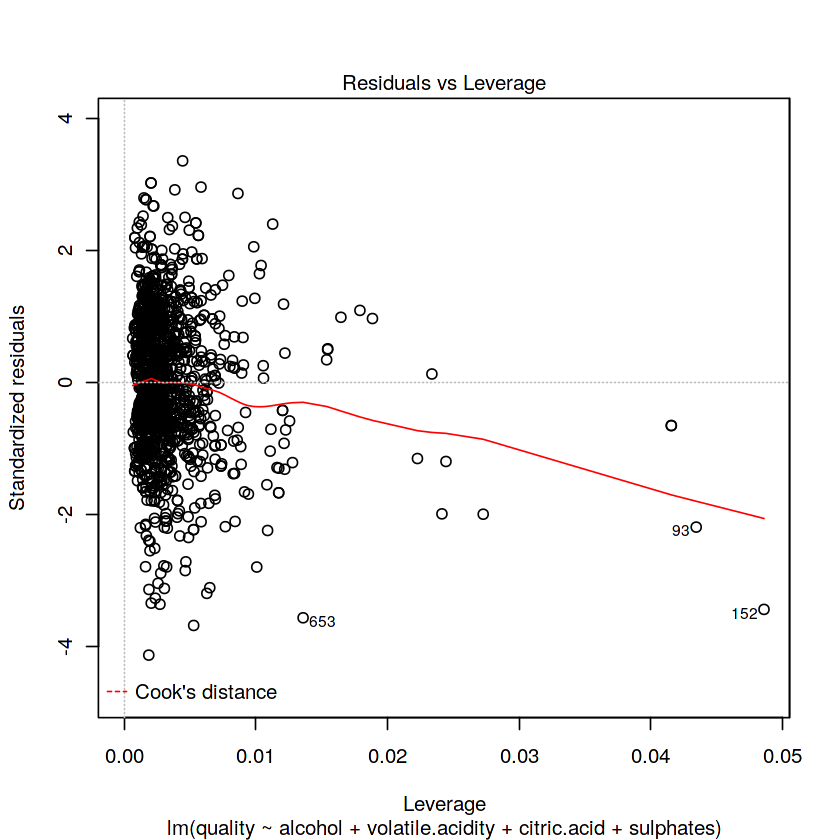

In [9]:
plot(linear_quality_4)
vif(linear_quality_4)

Check anova test result as well

In [10]:
anova(linear_quality_4)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
alcohol,1,236.2946461,236.2946461,544.4132548,7.889865e-104
volatile.acidity,1,94.0742269,94.0742269,216.7431930,4.274399e-46
citric.acid,1,0.1936266,0.1936266,0.4461078,5.042858e-01
sulphates,1,19.7501135,19.7501135,45.5034584,2.124999e-11
Residuals,1594,691.8524900,0.4340354,NA,NA


Final model with all the significant chemicals alcohol, volatile.acidity and sulphates

In [11]:

linear_quality_5 = lm(quality ~ alcohol + volatile.acidity + sulphates, data = wine_data)
summary(linear_quality_5)
anova(linear_quality_5)
vif(linear_quality_5)


Call:
lm(formula = quality ~ alcohol + volatile.acidity + sulphates, 
    data = wine_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7186 -0.3820 -0.0641  0.4746  2.1807 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       2.61083    0.19569  13.342  < 2e-16 ***
alcohol           0.30922    0.01580  19.566  < 2e-16 ***
volatile.acidity -1.22140    0.09701 -12.591  < 2e-16 ***
sulphates         0.67903    0.10080   6.737 2.26e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6587 on 1595 degrees of freedom
Multiple R-squared:  0.3359,	Adjusted R-squared:  0.3346 
F-statistic: 268.9 on 3 and 1595 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
alcohol,1,236.29465,236.2946461,544.55632,7.333605e-104
volatile.acidity,1,94.07423,94.0742269,216.80015,4.151731e-46
sulphates,1,19.69159,19.6915875,45.38054,2.258238e-11
Residuals,1595,692.10464,0.4339214,NA,NA


alcohol volatile.acidity        sulphates 
        1.044612         1.111146         1.075095

In [12]:
The theoretical model performance is defined here as R-Squared ( summary of final model )

ERROR: Error in parse(text = x, srcfile = src): <text>:1:5: unexpected symbol
1: The theoretical
        ^


In [ ]:
summary(linear_quality_5)

# Model validation
Split data into training and validation samples to test your model.
We will use (train.size)% for training and (100-train.size)% for validation.

In [ ]:
set.seed(2018)
train.size <- 0.8 
train.index <- sample.int(length(wine_data$quality), round(length(wine_data$quality) * train.size))
train.sample <- wine_data[train.index,]
valid.sample <- wine_data[-train.index,]

VIF, F-ratio and p-values say it looks good for model4, so no need to do anything here as the final model is also almost same as last model.
Now to evaluate the final model, find all predicted values for both a training set and a validation set 
Check how good is the model on the training set - correlation^2, RME and MAE

In [ ]:

train.sample$Pred.quality <- predict(linear_quality_5, 
                                     newdata = subset(train.sample, select=c(quality, alcohol, volatile.acidity, citric.acid, sulphates)))
valid.sample$Pred.quality <- predict(linear_quality_5, 
                                     newdata = subset(valid.sample, select=c(quality, alcohol, volatile.acidity, citric.acid, sulphates)))

train.corr <- round(cor(train.sample$Pred.quality, train.sample$quality), 2)
train.RMSE <- round(sqrt(mean((train.sample$Pred.quality - train.sample$quality)^2)))
train.MAE <- round(mean(abs(train.sample$Pred.quality - train.sample$quality)))
c(train.corr^2, train.RMSE, train.MAE)

Check how good is the model on the validation set - correlation^2, RME and MAE

In [ ]:
valid.corr <- round(cor(valid.sample$Pred.quality, valid.sample$quality), 2)
valid.RMSE <- round(sqrt(mean((valid.sample$Pred.quality - valid.sample$quality)^2)))
valid.MAE <- round(mean(abs(valid.sample$Pred.quality - valid.sample$quality)))
c(valid.corr^2, valid.RMSE, valid.MAE)

Quality ~ alcohol

In [ ]:
cor(wine_data$quality,wine_data$alcohol)

Quality ~ acidity

In [ ]:
cor(wine_data$quality,wine_data$volatile.acidity)

Quality ~ acid

In [ ]:
cor(wine_data$quality,wine_data$citric.acid)

Quality ~ sulphates

In [ ]:
cor(wine_data$quality,wine_data$sulphates)

Below are few plots, just for checking their relation with quality

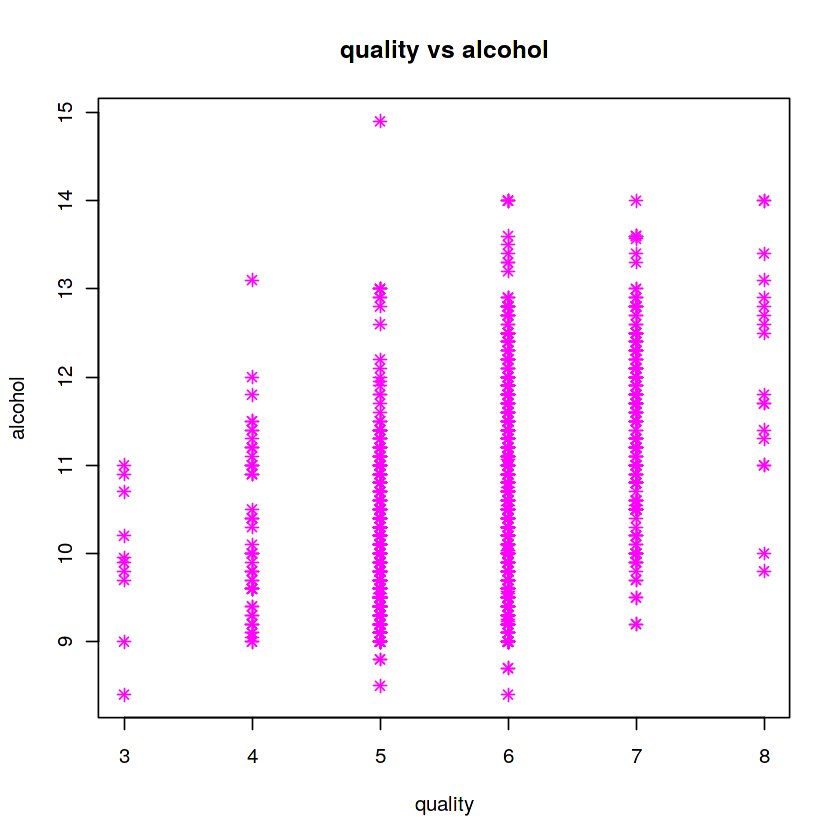

In [13]:
plot(wine_data$quality,wine_data$alcohol,main="quality vs alcohol",xlab="quality",ylab="alcohol",col=6,pch=8)


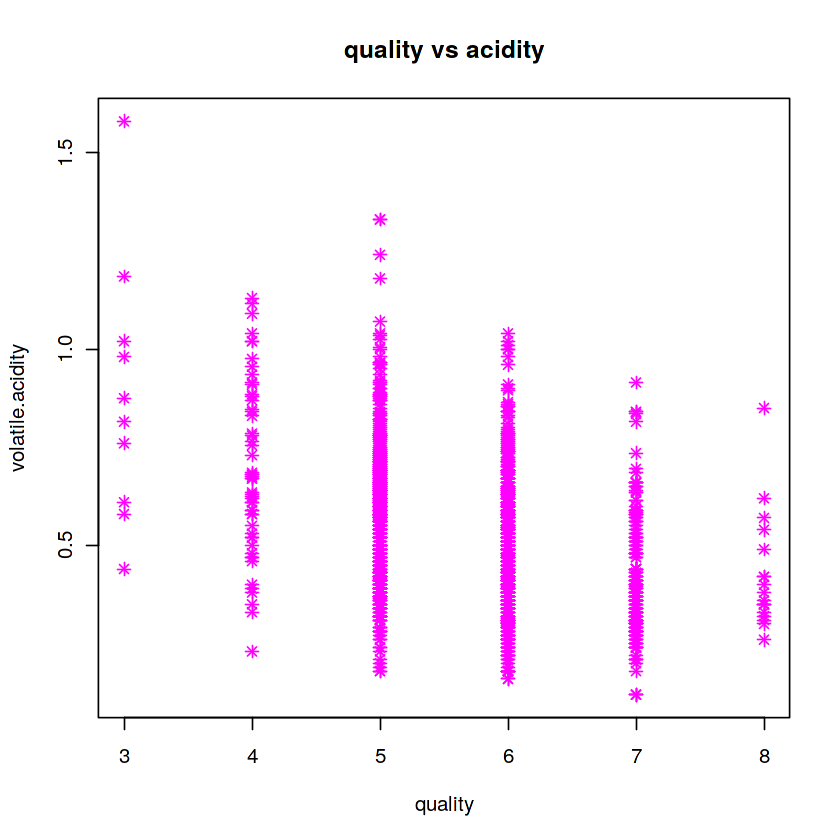

In [14]:
plot(wine_data$quality,wine_data$volatile.acidity,main="quality vs acidity",xlab="quality",ylab="volatile.acidity",col=6,pch=8)


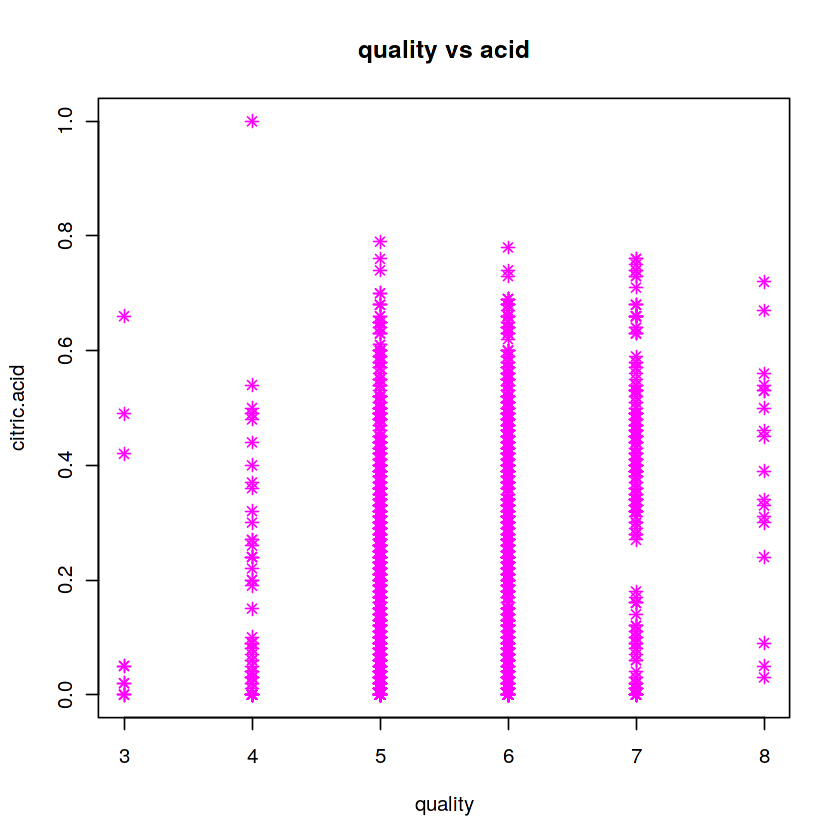

In [15]:
plot(wine_data$quality,wine_data$citric.acid,main="quality vs acid",xlab="quality",ylab="citric.acid",col=6,pch=8)


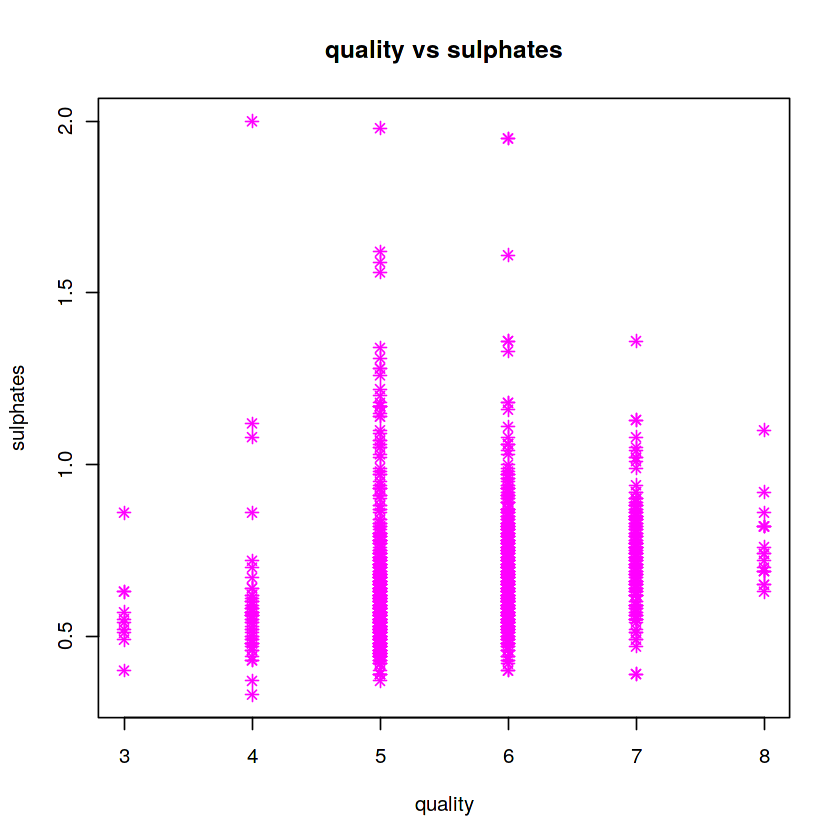

In [16]:
plot(wine_data$quality,wine_data$sulphates,main="quality vs sulphates",xlab="quality",ylab="sulphates",col=6,pch=8)

Above data clearly shows that the above tested data is better then the R-squared value.
So, wine quality is depends majorly on alcohol, volatile.acidity and sulphates from given set of data and all other parameters does not have much of an impact on wine quality.